In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import joblib

%matplotlib inline

DATA 불러오기

In [47]:
cl10 = pd.read_csv("/content/drive/MyDrive/YSAL/2023-1/LOL/CL10_fix.csv")
cl15 = pd.read_csv("/content/drive/MyDrive/YSAL/2023-1/LOL/CL15_fix.csv")
gm10 = pd.read_csv("/content/drive/MyDrive/YSAL/2023-1/LOL/GM10_fix.csv")
gm15 = pd.read_csv("/content/drive/MyDrive/YSAL/2023-1/LOL/GM15_fix.csv")

cl10_label = cl10["blueWins"]
cl10_label = cl10["blueWins"]
cl10_label = cl10["blueWins"]
cl10_label = cl10["blueWins"]

In [22]:
datas = [cl10, cl15, gm10, gm15]
data_label = ["cl10", "cl15", "gm10", "gm15"]
datas[0]

,blueWins,blueTotalGolds,blueTotalLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueTotalDamageToChampion,blueFirstBlood,blueKill,blueDeath,blueAssist,blueWardPlaced,blueWardKills,blueFirstTower,blueFirstInhibitor,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragon,blueRiftHeralds,redTotalGolds,redTotalLevel,redTotalMinionKills,redTotalJungleMinionKills,redTotalDamageToChampion,redFirstBlood,redKill,redDeath,redAssist,redWardPlaced,redWardKills,redFirstTower,redFirstInhibitor,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragon,redRiftHeralds,blueWATER_DRAGON,blueFIRE_DRAGON,blueAIR_DRAGON,blueEARTH_DRAGON,blueCHEMTECH_DRAGON,blueHEXTECH_DRAGON,redWATER_DRAGON,redFIRE_DRAGON,redAIR_DRAGON,redEARTH_DRAGON,redCHEMTECH_DRAGON,redHEXTECH_DRAGON
0,0,12794,27,175,64,13135,1,6,7,11,15,4,0,0,0,0,0,0,0,0,0,0,18590,38,191,51,14842,0,7,6,10,14,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,13539,27,210,58,8545,0,5,3,7,16,2,0,0,0,0,0,0,0,1,1,0,16062,37,251,40,11507,1,3,5,1,16,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,13780,27,190,46,12009,0,8,3,10,13,4,0,0,0,0,0,0,0,1,1,0,16738,39,213,41,13507,1,3,8,3,16,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,12664,27,204,48,15293,0,4,8,5,22,3,0,0,0,0,0,0,0,0,0,0,18435,38,215,32,15556,1,8,4,9,22,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,11478,26,193,52,9808,0,3,6,3,15,3,0,0,0,0,0,0,0,0,0,1,17904,38,222,48,15216,1,6,3,8,177,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,0,14948,27,211,52,13230,1,8,6,14,27,7,0,0,0,0,0,0,0,1,1,0,17857,38,204,48,15826,0,6,8,10,16,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1518,1,14636,27,207,60,13235,0,8,6,12,31,1,0,0,0,0,0,0,0,1,1,0,17738,37,204,52,14902,1,6,8,6,13,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1519,0,10799,24,164,48,4895,0,2,10,1,9,2,0,0,0,0,0,0,0,0,0,0,19284,39,255,45,14057,1,10,2,11,9,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1520,0,11688,27,199,40,10698,0,3,3,5,23,7,0,0,0,0,0,0,0,0,0,0,16334,37,242,40,11739,1,3,3,4,21,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


LGBM

In [2]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric, plot_tree, plot_split_value_histogram, create_tree_digraph

In [12]:
param = {'colsample_bytree': 0.2471782237169994, 'learning_rate': 0.1479768945366217, 'max_depth': 4, 'min_child_weight': 0.34655810805870224, 
         'n_estimators': 88, 'subsample': 0.721248184307204}

lgbm_model = LGBMClassifier(**param)



score 얼마나 나오는지

In [56]:
for i, data in enumerate(datas):
  x_train, x_test, y_train, y_test = train_test_split(data.drop("blueWins", axis=1), data["blueWins"])
  lgbm_model.fit(x_train, y_train)
  y_pred = lgbm_model.predict(x_test)

  # 각 모델 pickle로 저장 
  joblib.dump(lgbm_model, data_label[i]+".pkl")

  # 정확도 출력
  print("Data: ", data_label[i])
  print("F1 score: " , (f1_score(y_test, y_pred)))
  print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100.0),"\n")


Data:  cl10
F1 score:  0.6646153846153846
Accuracy: 71.39% 

Data:  cl15
F1 score:  0.7790697674418604
Accuracy: 80.05% 

Data:  gm10
F1 score:  0.6984478935698448
Accuracy: 71.70% 

Data:  gm15
F1 score:  0.7627695800227015
Accuracy: 78.18% 



In [34]:
cl10_pkl = joblib.load("cl10.pkl")
cl15_pkl = joblib.load("cl15.pkl")
gm10_pkl = joblib.load("gm10.pkl")
gm15_pkl = joblib.load("gm15.pkl")

In [57]:
cl10_pred = cl10_pkl.predict(cl10.drop("blueWins",axis=1))
cl15_pred = cl10_pkl.predict(cl15.drop("blueWins",axis=1))
gm10_pred = cl10_pkl.predict(gm10.drop("blueWins",axis=1))
gm15_pred = cl10_pkl.predict(gm15.drop("blueWins",axis=1))

## cl10으로 분석

In [66]:
import seaborn as sns

In [67]:
c10_O = cl10[cl10_label==cl10_pred]
c10_X = cl10[cl10_label!=cl10_pred]


In [82]:
np.abs(cl10.corr()["blueWins"]).sort_values(ascending = False)[1:11]

blueTotalGolds               0.415878
blueKill                     0.337567
redDeath                     0.337567
redTotalGolds                0.318015
blueDeath                    0.317952
redKill                      0.317952
redAssist                    0.275045
blueAssist                   0.269195
blueTotalDamageToChampion    0.250728
blueTotalLevel               0.238933
Name: blueWins, dtype: float64

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

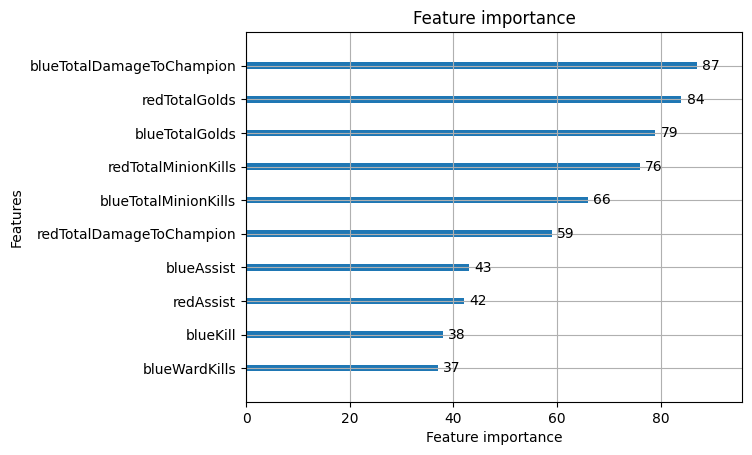

In [79]:
plot_importance(cl10_pkl, max_num_features=10)